In [63]:
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
with open('pickles/DI.pkl', 'rb') as f:
    DI = pickle.load(f)

# DI = DI.iloc[0:100]

with open('pickles/ydf.pkl', 'rb') as f:
    y = pickle.load(f)
    
with open('pickles/used_column_headers.pkl', 'rb') as f:
    ch = pickle.load(f)

from featurizer import DerivativeFeaturizer
from tsm import TriggeredSeriesModel

ts = TriggeredSeriesModel(ch)

DI = ts._subset_data(DI, 60)

d = DerivativeFeaturizer(order=1, dx=20.0, reference_time=9, maxmin=True, verbose=True, gauss=True)
X, tp = d.fit_transform(DI)

Taking derivatives of trial 0
Taking derivatives of trial 100
Taking derivatives of trial 200
Taking derivatives of trial 300
Taking derivatives of trial 400
Taking derivatives of trial 500
Taking derivatives of trial 600
Taking derivatives of trial 700
Taking derivatives of trial 800
Taking derivatives of trial 900
Taking derivatives of trial 1000
Regressed 1078 trials in 209 seconds


In [72]:
npX = ts._pandas_to_numpy(X)
npy = y['detection'].values
print npX.shape, npy.shape

(1078, 219) (1078,)


In [74]:
from unbalanced_dataset import UnderSampler, SMOTE

y.groupby('detection').count()
# type(smoy)

,classification,gram
detection,,
0,99,99
1,979,979


In [73]:
smote = SMOTE(ratio=10, kind='regular')
smox, smoy = smote.fit_transform(npX, npy)
print np.sum(smoy[1078:]), np.sum(smoy[:1078])
print np.sum(smoy==0), np.sum(npy==0)
print np.sum(smoy==1), np.sum(npy==1)

0.0 979.0
1089 99
979 979


In [67]:
import pandas as pd
sdf = pd.DataFrame({
        'detection': smoy[len(y):], 
        'classification': ['Control']*(len(smoy[len(y):])), 
        'gram': ['Control']*(len(smoy[len(y):])),
        'synthetic': [1]*(len(smoy[len(y):]))})
print sdf.head()
print y.iloc[1056:len(y)]
newdf = pd.concat([y, sdf])
newdf = newdf.fillna(0)
print newdf.head()
newdf.info()

  classification  detection     gram  synthetic
0        Control          0  Control          1
1        Control          0  Control          1
2        Control          0  Control          1
3        Control          0  Control          1
4        Control          0  Control          1
             classification gram  detection
1215  Staphylococcus_aureus    p          1
1216  Staphylococcus_aureus    p          1
1217  Staphylococcus_aureus    p          1
1218  Staphylococcus_aureus    p          1
1219  Staphylococcus_aureus    p          1
1220  Staphylococcus_aureus    p          1
1221  Staphylococcus_aureus    p          1
1222  Staphylococcus_aureus    p          1
1223  Staphylococcus_aureus    p          1
1224  Staphylococcus_aureus    p          1
1225  Staphylococcus_aureus    p          1
1226  Staphylococcus_aureus    p          1
1227  Staphylococcus_aureus    p          1
1228  Staphylococcus_aureus    p          1
1229  Staphylococcus_aureus    p          1
1230  St

In [68]:
import numpy as np
print np.sum(smoy==0), np.sum(npy==0)
print np.sum(smoy==1), np.sum(npy==1)

1089 99
979 979


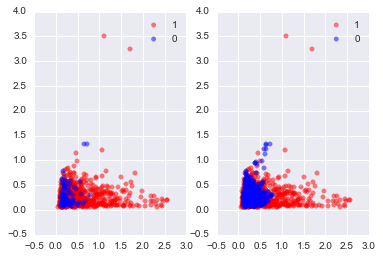

In [69]:
# plot before in dimensions 1 & 2
p1 = 1
p2 = 5

import seaborn as sns
plt.subplot(1,2,1)
mask = npy == 1
plt.scatter(npX[mask,p1], npX[mask,p2], label='1', color='r', alpha=0.5)
mask = npy == 0
plt.scatter(npX[mask,p1], npX[mask,p2], label='0', color='b', alpha=0.5)
plt.legend()

plt.subplot(1,2,2)
mask = smoy == 1
plt.scatter(smox[mask,p1], smox[mask,p2], label='1', color='r', alpha=0.5)
mask = smoy == 0
plt.scatter(smox[mask,p1], smox[mask,p2], label='0', color='b', alpha=0.5)
plt.legend()

In [70]:
smoy

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

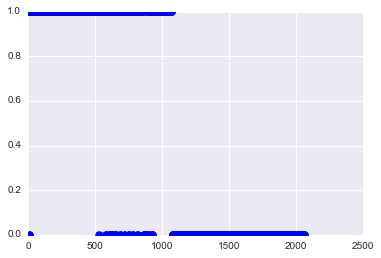

In [71]:
plt.plot(range(len(smoy)), smoy, 'bo')